In [1]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

In [2]:
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# sklearn
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from wordcloud import WordCloud
from statsmodels.stats.anova import anova_lm


In [4]:
# nltk
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Dataset Visualisation

In [6]:
path = './tweet_million.csv'

# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]

DATASET_ENCODING = "ISO-8859-1"

tweets = pd.read_csv(path, encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [7]:
tweets

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
# Display the first few rows of the DataFrame to understand its structure and content
print("Sample of the dataset:")
print(tweets.head())

Sample of the dataset:
   sentiment         ids                          date      flag  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [9]:
# Get the shape of the dataset (number of rows and columns)
print("\nShape of the dataset:")
print(tweets.shape)


Shape of the dataset:
(1600000, 6)


In [10]:
# Get general information about the dataset such as data types and non-null counts
print("\nInformation about the dataset:")
print(tweets.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [11]:
# Describe numerical columns to get basic statistics
print("\nStatistics of numerical columns:")
print(tweets.describe())


Statistics of numerical columns:
          sentiment           ids
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956916e+09
50%    2.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09


In [12]:
# Describe categorical columns
print("\nStatistics of categorical columns:")
print(tweets.describe(include=['object']))


Statistics of categorical columns:
                                date      flag      user  \
count                        1600000   1600000   1600000   
unique                        774363         1    659775   
top     Mon Jun 15 12:53:14 PDT 2009  NO_QUERY  lost_dog   
freq                              20   1600000       549   

                             text  
count                     1600000  
unique                    1581466  
top     isPlayer Has Died! Sorry   
freq                          210  


In [13]:
# Count the number of unique values in each column
print("\nNumber of unique values in each column:")
print(tweets.nunique())


Number of unique values in each column:
sentiment          2
ids          1598315
date          774363
flag               1
user          659775
text         1581466
dtype: int64


In [14]:
# Check for missing values
print("\nNumber of missing values in each column:")
print(tweets.isnull().sum())


Number of missing values in each column:
sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64


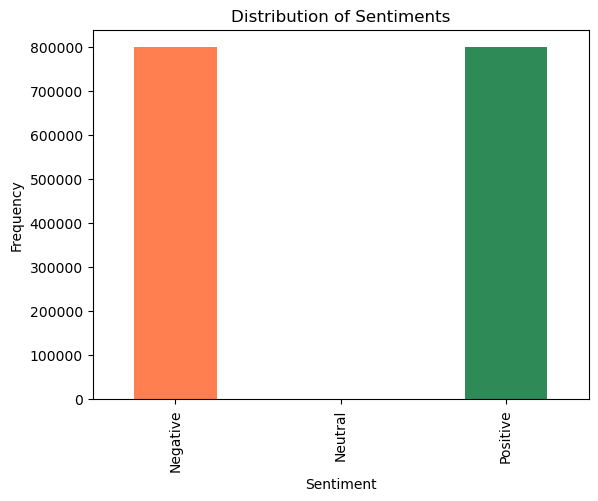

In [15]:
# Count the occurrences of each sentiment value
sentiment_counts = tweets['sentiment'].value_counts()

# Map sentiment labels to corresponding emotions
sentiment_labels = {0: 'Negative', 2: 'Neutral', 4: 'Positive'}

# Replace sentiment values with corresponding emotions and include all sentiments
sentiment_counts = sentiment_counts.rename(index=sentiment_labels).reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)

# Plot the distribution of sentiments
sentiment_counts.plot(kind='bar', color=['coral', 'grey', 'SeaGreen'])

# Add labels and title
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Show plot
plt.show()

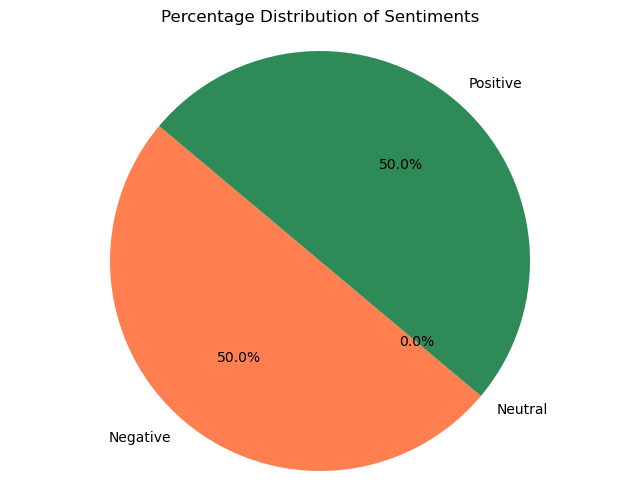

In [16]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment value
sentiment_counts = tweets['sentiment'].value_counts()

# Map sentiment labels to corresponding emotions
sentiment_labels = {0: 'Negative', 2: 'Neutral', 4: 'Positive'}

# Replace sentiment values with corresponding emotions and include all sentiments
sentiment_counts = sentiment_counts.rename(index=sentiment_labels).reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['coral', 'grey', 'SeaGreen'], startangle=140)
plt.title('Percentage Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Data Preprocessing

In [17]:
# Removing the unnecessary columns.
tweet_df = tweets[['sentiment','text']]
tweet_df

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [18]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [19]:
#removing unnecessary words
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [20]:
tweet_df.text = tweet_df.text.apply(lambda x: preprocess(x))
tweet_df

C:\Users\risha\AppData\Local\Temp\ipykernel_13664\1211118405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df.text = tweet_df.text.apply(lambda x: preprocess(x))


,sentiment,text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many times ball managed save 50 rest go ...
3,0,whole body feels itchy like fire
4,0,behaving mad see
...,...,...
1599995,4,woke school best feeling ever
1599996,4,thewdb com cool hear old walt interviews
1599997,4,ready mojo makeover ask details
1599998,4,happy 38th birthday boo alll time tupac amaru ...


In [21]:
# Word Count
tweet_df['word_count'] = tweet_df['text'].apply(lambda x: len(str(x).split()))

# Character Count
tweet_df['char_count'] = tweet_df['text'].apply(lambda x: len(str(x)))

# Average Word Length
def avg_word_length(text):
    words = text.split()
    if len(words)> 0:
        return sum(len(word) for word in words) / len(words)
    else:
        return 0

tweet_df['avg_word_length'] = tweet_df['text'].apply(avg_word_length)
tweet_df

C:\Users\risha\AppData\Local\Temp\ipykernel_13664\155125913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['word_count'] = tweet_df['text'].apply(lambda x: len(str(x).split()))
C:\Users\risha\AppData\Local\Temp\ipykernel_13664\155125913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['char_count'] = tweet_df['text'].apply(lambda x: len(str(x)))
C:\Users\risha\AppData\Local\Temp\ipykernel_13664\155125913.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,sentiment,text,word_count,char_count,avg_word_length
0,0,awww bummer shoulda got david carr third day,8,44,4.625000
1,0,upset update facebook texting might cry result...,11,69,5.363636
2,0,dived many times ball managed save 50 rest go ...,10,52,4.300000
3,0,whole body feels itchy like fire,6,32,4.500000
4,0,behaving mad see,3,16,4.666667
...,...,...,...,...,...
1599995,4,woke school best feeling ever,5,29,5.000000
1599996,4,thewdb com cool hear old walt interviews,7,40,4.857143
1599997,4,ready mojo makeover ask details,5,31,5.400000
1599998,4,happy 38th birthday boo alll time tupac amaru ...,9,52,4.888889


In [22]:
# Emoticons Count
tweet_df['emoticons_count'] = tweet_df['text'].apply(lambda x: len(re.findall(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251\U0001F004\U0001F0CF\U0001F170-\U0001F251\U0001F600-\U0001F64F\U0001F680-\U0001F6FF]', x)))

# Exclamation and Question Marks Count
tweet_df['exclam_question_marks_count'] = tweet_df['text'].apply(lambda x: len(re.findall(r'[!?]', x)))

# Capitalized Words Count
tweet_df['capitalized_words_count'] = tweet_df['text'].apply(lambda x: len(re.findall(r'\b[A-Z]+\b', x)))

# Punctuation Count
tweet_df['punctuation_count'] = tweet_df['text'].apply(lambda x: len(re.findall(r'[^\w\s]', x)))
tweet_df

,sentiment,text,word_count,char_count,avg_word_length,emoticons_count,exclam_question_marks_count,capitalized_words_count,punctuation_count
0,0,awww bummer shoulda got david carr third day,8,44,4.625000,0,0,0,0
1,0,upset update facebook texting might cry result...,11,69,5.363636,0,0,0,0
2,0,dived many times ball managed save 50 rest go ...,10,52,4.300000,0,0,0,0
3,0,whole body feels itchy like fire,6,32,4.500000,0,0,0,0
4,0,behaving mad see,3,16,4.666667,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1599995,4,woke school best feeling ever,5,29,5.000000,0,0,0,0
1599996,4,thewdb com cool hear old walt interviews,7,40,4.857143,0,0,0,0
1599997,4,ready mojo makeover ask details,5,31,5.400000,0,0,0,0
1599998,4,happy 38th birthday boo alll time tupac amaru ...,9,52,4.888889,0,0,0,0


In [23]:

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

def get_positive_and_negative_words(sentence):
    # Tokenize the sentence
    words = nltk.word_tokenize(sentence)

    # Separate positive and negative words
    positive_words = [word for word in words if sid.polarity_scores(word)['compound'] > 0]
    negative_words = [word for word in words if sid.polarity_scores(word)['compound'] < 0]

    return positive_words, negative_words


In [24]:
# Apply the function to each row of the DataFrame
tweet_df['positive_words'], tweet_df['negative_words'] = zip(*tweet_df['text'].apply(get_positive_and_negative_words))

# Count the occurrences of positive and negative words
tweet_df['positive_words_count'] = tweet_df['positive_words'].apply(len)
tweet_df['negative_words_count'] = tweet_df['negative_words'].apply(len)

# Drop intermediate columns if needed
tweet_df.drop(['positive_words', 'negative_words'], axis=1, inplace=True)

In [25]:
tweet_df

,sentiment,text,word_count,char_count,avg_word_length,emoticons_count,exclam_question_marks_count,capitalized_words_count,punctuation_count,positive_words_count,negative_words_count
0,0,awww bummer shoulda got david carr third day,8,44,4.625000,0,0,0,0,0,1
1,0,upset update facebook texting might cry result...,11,69,5.363636,0,0,0,0,0,3
2,0,dived many times ball managed save 50 rest go ...,10,52,4.300000,0,0,0,0,1,0
3,0,whole body feels itchy like fire,6,32,4.500000,0,0,0,0,1,2
4,0,behaving mad see,3,16,4.666667,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1599995,4,woke school best feeling ever,5,29,5.000000,0,0,0,0,2,0
1599996,4,thewdb com cool hear old walt interviews,7,40,4.857143,0,0,0,0,1,0
1599997,4,ready mojo makeover ask details,5,31,5.400000,0,0,0,0,1,0
1599998,4,happy 38th birthday boo alll time tupac amaru ...,9,52,4.888889,0,0,0,0,1,0


In [26]:
tweet_df.drop(['text'], axis=1, inplace=True)
tweet_df

,sentiment,word_count,char_count,avg_word_length,emoticons_count,exclam_question_marks_count,capitalized_words_count,punctuation_count,positive_words_count,negative_words_count
0,0,8,44,4.625000,0,0,0,0,0,1
1,0,11,69,5.363636,0,0,0,0,0,3
2,0,10,52,4.300000,0,0,0,0,1,0
3,0,6,32,4.500000,0,0,0,0,1,2
4,0,3,16,4.666667,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1599995,4,5,29,5.000000,0,0,0,0,2,0
1599996,4,7,40,4.857143,0,0,0,0,1,0
1599997,4,5,31,5.400000,0,0,0,0,1,0
1599998,4,9,52,4.888889,0,0,0,0,1,0


## Dataset Description and visualization

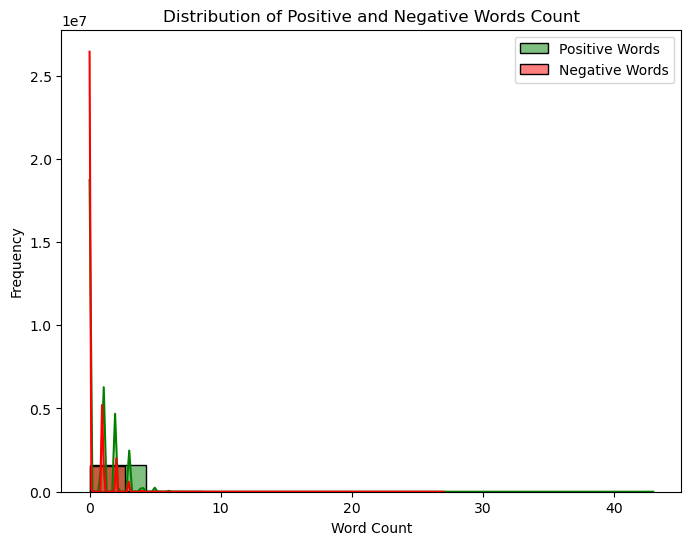

In [27]:
# Finally, let's visualize positive and negative word counts
plt.figure(figsize=(8, 6))
sns.histplot(tweet_df['positive_words_count'], bins=10, kde=True, color='green', label='Positive Words')
sns.histplot(tweet_df['negative_words_count'], bins=10, kde=True, color='red', label='Negative Words')
plt.title('Distribution of Positive and Negative Words Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

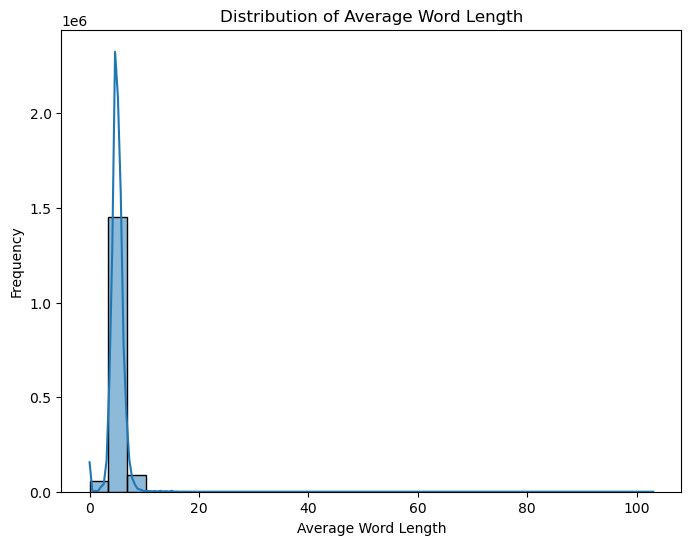

In [28]:
# Plotting average word length distribution
plt.figure(figsize=(8, 6))
sns.histplot(tweet_df['avg_word_length'], bins=30, kde=True)
plt.title('Distribution of Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()

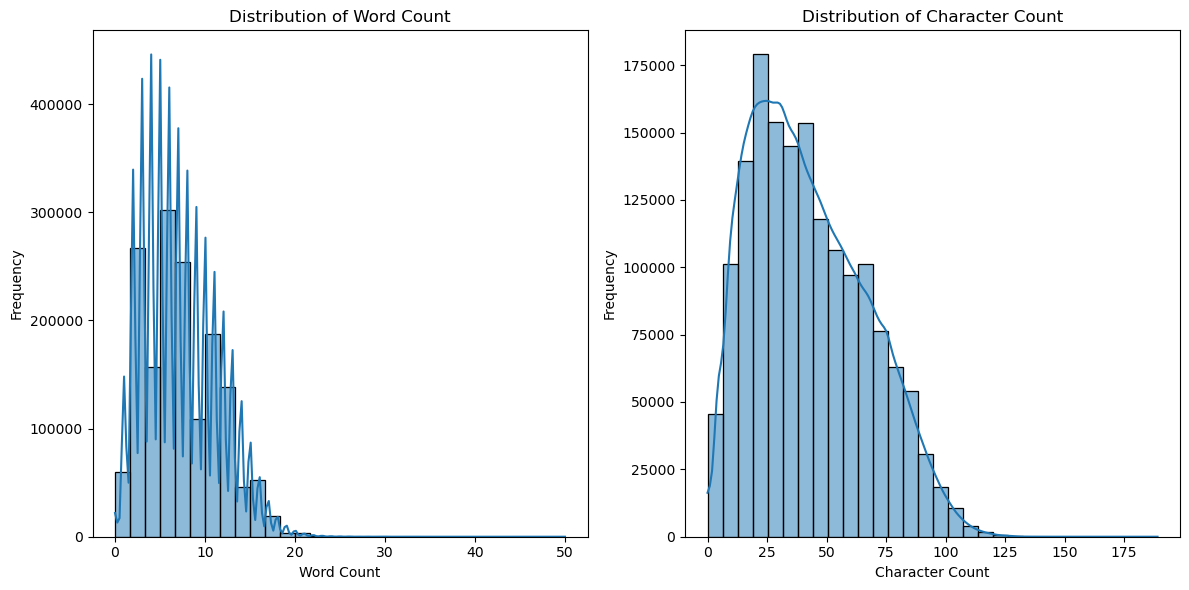

In [29]:
# Next, let's plot word count and character count distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(tweet_df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(tweet_df['char_count'], bins=30, kde=True)
plt.title('Distribution of Character Count')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Train Test Split

In [30]:
# Split the data into training and test sets
X = tweet_df.iloc[:, 1:]  # Features
# Drop the first column
X = X.drop(X.columns[0], axis=1)
X

,char_count,avg_word_length,emoticons_count,exclam_question_marks_count,capitalized_words_count,punctuation_count,positive_words_count,negative_words_count
0,44,4.625000,0,0,0,0,0,1
1,69,5.363636,0,0,0,0,0,3
2,52,4.300000,0,0,0,0,1,0
3,32,4.500000,0,0,0,0,1,2
4,16,4.666667,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1599995,29,5.000000,0,0,0,0,2,0
1599996,40,4.857143,0,0,0,0,1,0
1599997,31,5.400000,0,0,0,0,1,0
1599998,52,4.888889,0,0,0,0,1,0


In [31]:
y = tweet_df[['sentiment']]
y


,sentiment
0,0
1,0
2,0
3,0
4,0
...,...
1599995,4
1599996,4
1599997,4
1599998,4


In [32]:
# Drop rows with NaN in the 'horsepower' column
X.dropna(inplace=True)
y.dropna(inplace=True)

C:\Users\risha\AppData\Local\Temp\ipykernel_13664\1176809128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.dropna(inplace=True)


In [33]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
tweet_df

,sentiment,word_count,char_count,avg_word_length,emoticons_count,exclam_question_marks_count,capitalized_words_count,punctuation_count,positive_words_count,negative_words_count
0,0,8,44,4.625000,0,0,0,0,0,1
1,0,11,69,5.363636,0,0,0,0,0,3
2,0,10,52,4.300000,0,0,0,0,1,0
3,0,6,32,4.500000,0,0,0,0,1,2
4,0,3,16,4.666667,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1599995,4,5,29,5.000000,0,0,0,0,2,0
1599996,4,7,40,4.857143,0,0,0,0,1,0
1599997,4,5,31,5.400000,0,0,0,0,1,0
1599998,4,9,52,4.888889,0,0,0,0,1,0


## Analysis

### Logistic Regression

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and fit logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)  # You can adjust max_iter as needed
log_reg_model.fit(X_train, y_train)

# Predict sentiment on the testing set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,'%')

# Calculate test error (MSE)
test_error = mean_squared_error(y_test, y_pred)
print("Test Error (MSE):", test_error)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 66.3040625 %
Test Error (MSE): 5.39135

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64    159494
           4       0.65      0.72      0.68    160506

    accuracy                           0.66    320000
   macro avg       0.67      0.66      0.66    320000
weighted avg       0.66      0.66      0.66    320000



In [73]:
# import relevant statistical packages
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
# import data visualisation packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, f1_score


### Decision Tree

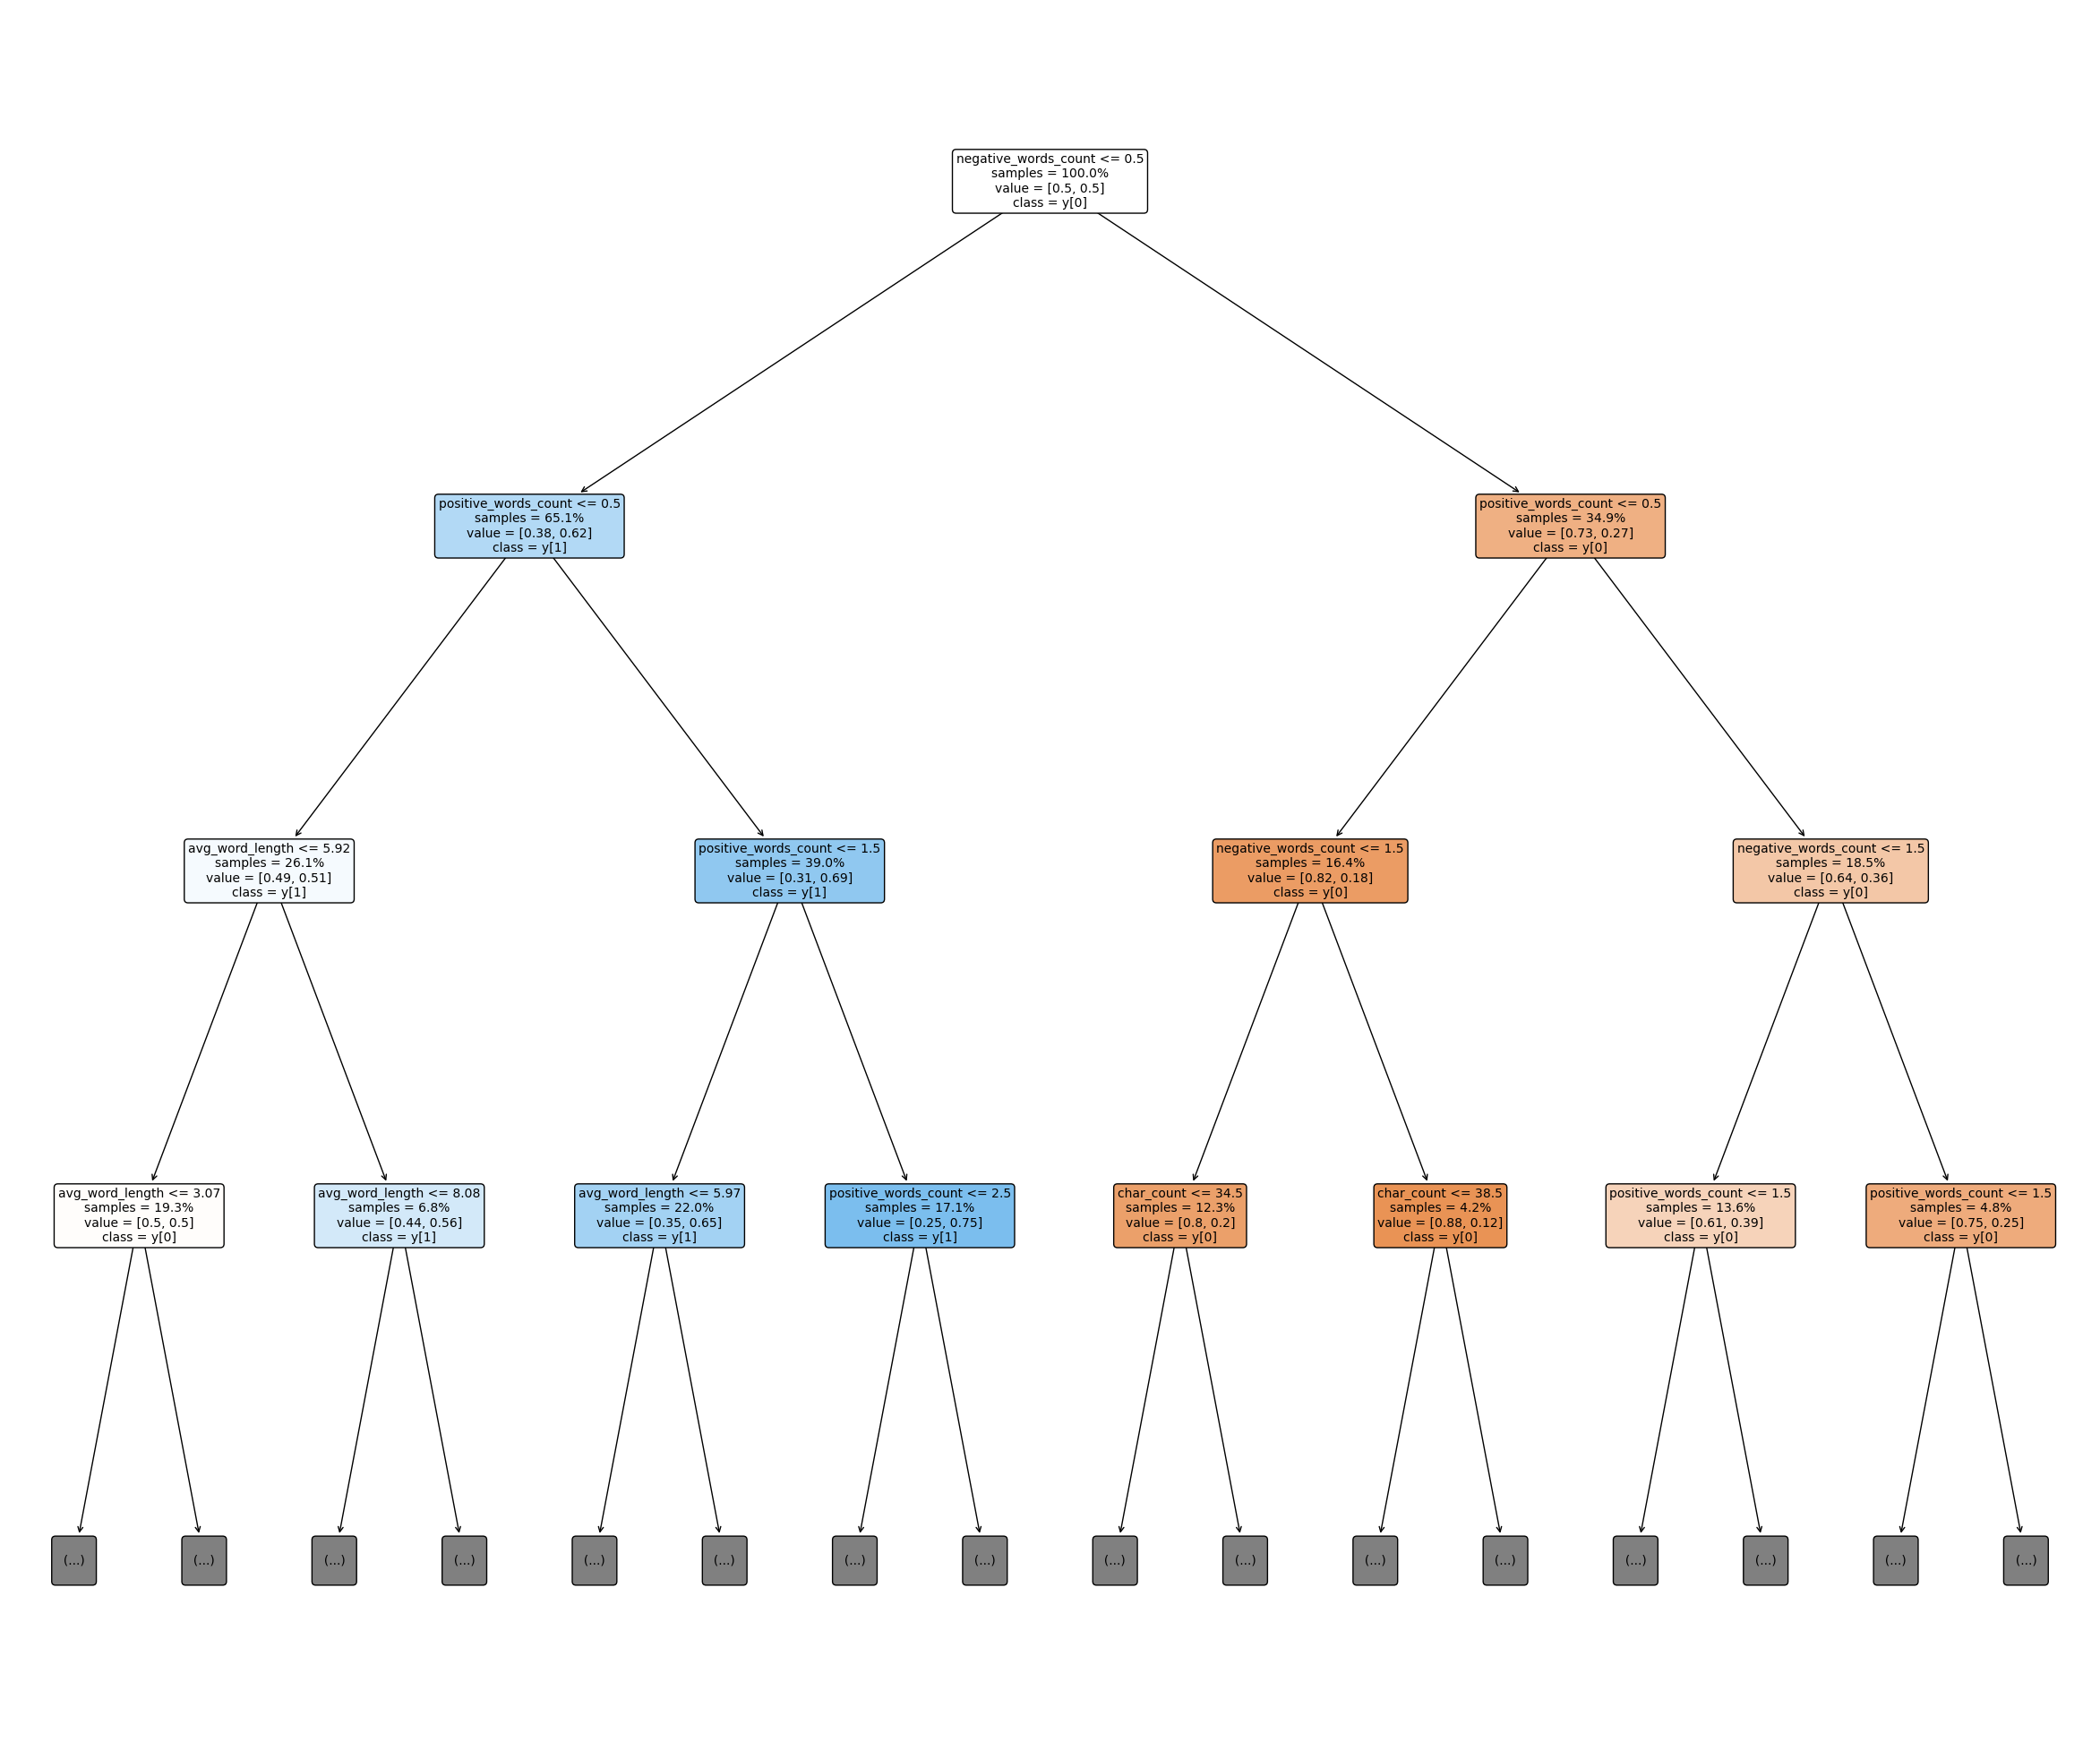

In [74]:
# Fit classification tree to the training set
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(30, 25))
tree.plot_tree(clf_tree, filled=True, feature_names=X.columns)
tree.plot_tree(clf_tree, 
               filled=True, 
               feature_names=X.columns, 
               fontsize=10,  # Adjust font size
               max_depth=3,  # Limit tree depth
               rounded=True,  # Round node corners
               precision=2,  # Set precision for displayed values
               proportion=True,  # Show proportion of samples in each node
               impurity=False,  # Do not show impurity at each node
               class_names=True,  # Show class names
               label="all",  # Show all attributes for non-leaf nodes
              )
plt.show()



In [75]:
# Make predictions on the testing data
y_pred = clf_tree.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,'%')

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # or average='macro' or average='micro' depending on your needs
print("F1 Score:", f1*100,'%')

Accuracy: 66.3134375 %
F1 Score: 66.24675678540645 %


Confusion Matrix:
[[ 98733  60761]
 [ 47036 113470]]


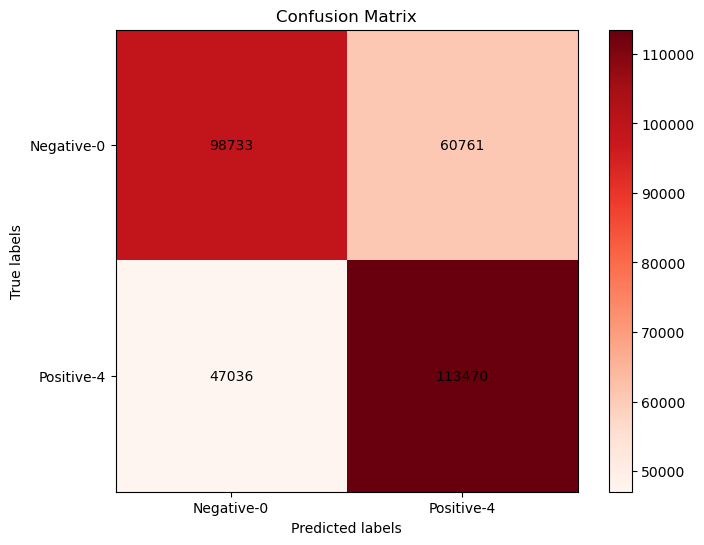

In [78]:
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Convert the confusion matrix values to a numpy array
cm = np.array(cm)

# Define class names
class_names = ['Negative-0', 'Positive-4']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center', color='Black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


                       Feature  Importance
7         negative_words_count    0.631591
6         positive_words_count    0.222171
1              avg_word_length    0.074375
0                   char_count    0.071863
2              emoticons_count    0.000000
3  exclam_question_marks_count    0.000000
4      capitalized_words_count    0.000000
5            punctuation_count    0.000000


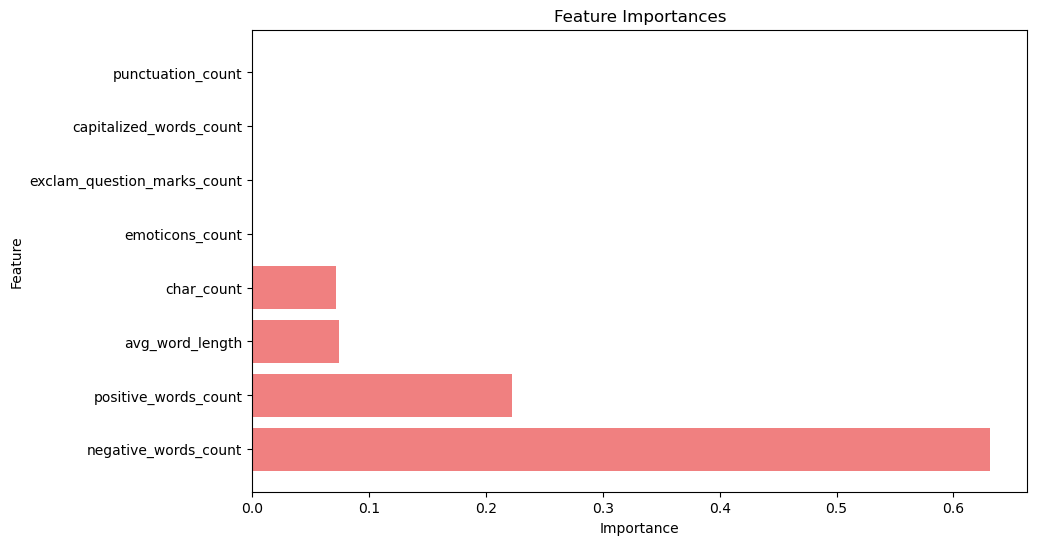

In [79]:
# Get feature importances
feature_importance = clf_tree.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance DataFrame
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

### Gradient Boosting

In [80]:
# Initialize the Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()

# Fit the Gradient Boosting regressor to the training data
grad_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = grad_clf.predict(X_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,'%')

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # or average='macro' or average='micro' depending on your needs
print("F1 Score:", f1*100,'%')

Accuracy: 66.6121875 %
F1 Score: 66.56308045756485 %


Confusion Matrix:
[[100190  59304]
 [ 47537 112969]]


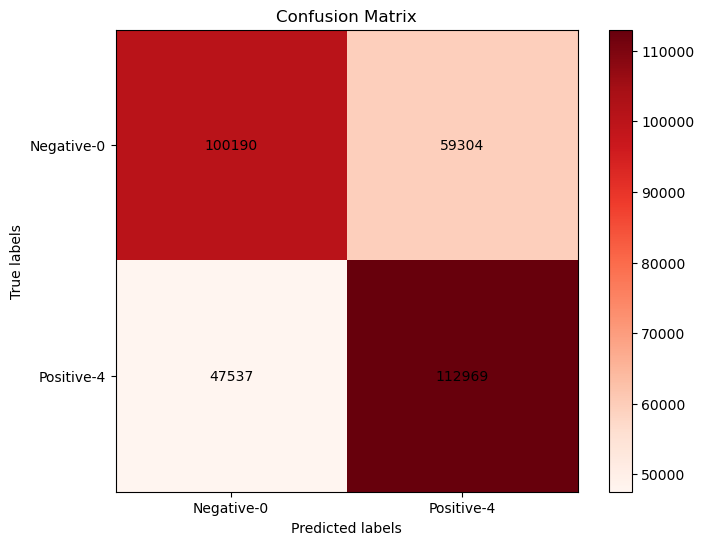

In [84]:
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Convert the confusion matrix values to a numpy array
cm = np.array(cm)

# Define class names
class_names = ['Negative-0', 'Positive-4']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center', color='Black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


                       Feature  Importance
7         negative_words_count    0.687239
6         positive_words_count    0.250066
0                   char_count    0.032858
1              avg_word_length    0.029837
2              emoticons_count    0.000000
3  exclam_question_marks_count    0.000000
4      capitalized_words_count    0.000000
5            punctuation_count    0.000000


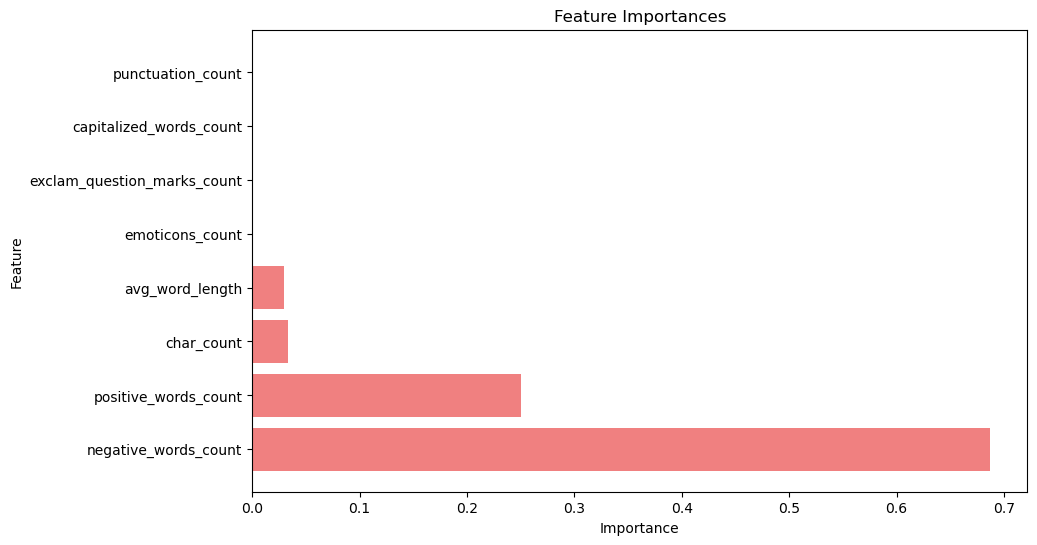

In [85]:
# Get feature importances
feature_importance = grad_clf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance DataFrame
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

### Random Forest

In [86]:
# Initialize the Gradient Boosting Classifier
rand_clf = RandomForestClassifier()

# Fit the Gradient Boosting regressor to the training data
rand_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rand_clf.predict(X_test)


C:\Users\risha\AppData\Local\Temp\ipykernel_13664\841402403.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_clf.fit(X_train, y_train)


In [87]:
# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,'%')

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # or average='macro' or average='micro' depending on your needs
print("F1 Score:", f1*100,'%')

Accuracy: 66.3246875 %
F1 Score: 66.2541000803661 %


Confusion Matrix:
[[ 98545  60949]
 [ 46812 113694]]


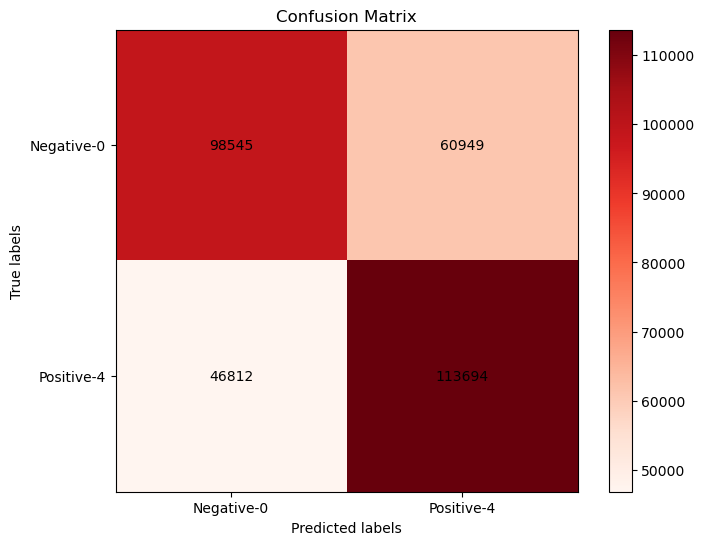

In [88]:
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Convert the confusion matrix values to a numpy array
cm = np.array(cm)

# Define class names
class_names = ['Negative-0', 'Positive-4']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center', color='Black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


                       Feature  Importance
7         negative_words_count    0.574875
6         positive_words_count    0.256982
1              avg_word_length    0.087442
0                   char_count    0.080701
2              emoticons_count    0.000000
3  exclam_question_marks_count    0.000000
4      capitalized_words_count    0.000000
5            punctuation_count    0.000000


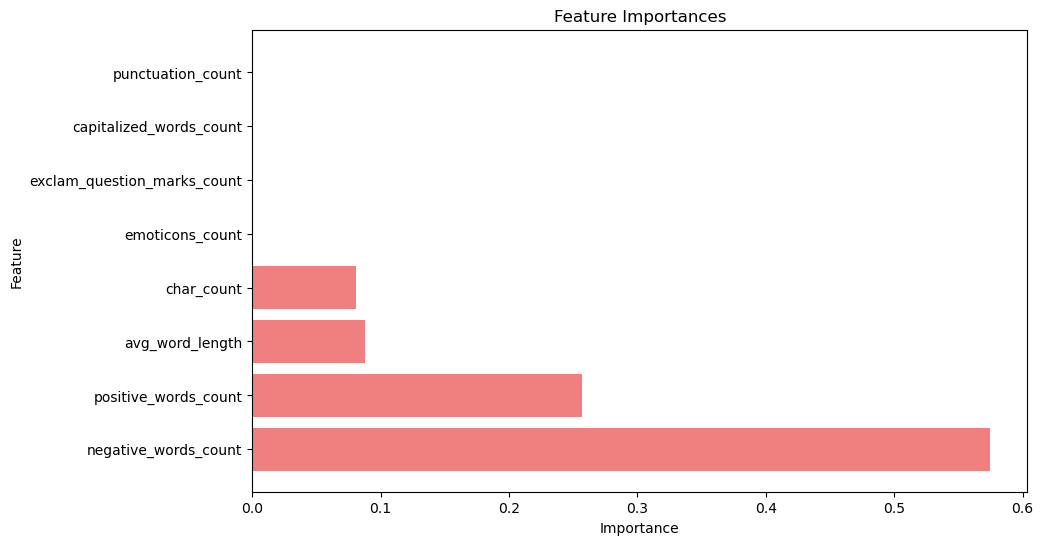

In [89]:
# Get feature importances
feature_importance = rand_clf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance DataFrame
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

### KNN

In [90]:
from sklearn.preprocessing import StandardScaler
# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [91]:
# Initialize the KNN classifier
clf = KNeighborsClassifier()

# Train the classifier on the training data
clf.fit(X_train_scaled, y_train_scaled)

# Make predictions on the testing data
y_pred = clf.predict(X_test_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [92]:
# Compute accuracy score
accuracy = accuracy_score(y_test_scaled, y_pred)
print("Accuracy:", accuracy*100,'%')

# Compute F1 score
f1 = f1_score(y_test_scaled, y_pred, average='weighted')  # or average='macro' or average='micro' depending on your needs
print("F1 Score:", f1*100,'%')

Accuracy: 62.716562499999995 %
F1 Score: 62.71322597140831 %


Confusion Matrix:
[[ 98559  60935]
 [ 58372 102134]]


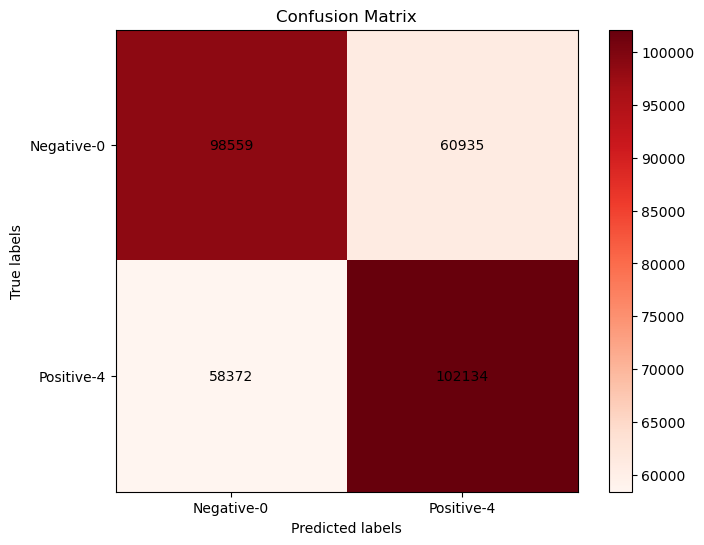

In [93]:
# Print the confusion matrix
cm = confusion_matrix(y_test_scaled, y_pred)
print("Confusion Matrix:")
print(cm)

# Convert the confusion matrix values to a numpy array
cm = np.array(cm)

# Define class names
class_names = ['Negative-0', 'Positive-4']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center', color='Black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


### SVM

In [35]:
# reducing the dataset
sampled_X_train = X_train.sample(frac=0.3, random_state=42)
sampled_y_train = y_train.loc[sampled_X_train.index]

In [97]:
# reducing the dataset
sampled_X_test = X_test.sample(frac=0.3, random_state=42)
sampled_y_test = y_test.loc[sampled_X_test.index]

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# Initialize the SVM classifier
svm_model = SVC(kernel='rbf')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the SVM classifier
svm_model.fit(sampled_X_train, sampled_y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(sampled_X_test)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
# Make predictions on the testing data
y_pred = svm_model.predict(sampled_X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(sampled_y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(sampled_y_test, y_pred)

print("Accuracy:", accuracy*100,'%')



Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.50      0.60     47847
           4       0.62      0.82      0.71     48153

    accuracy                           0.66     96000
   macro avg       0.68      0.66      0.65     96000
weighted avg       0.68      0.66      0.65     96000

Accuracy: 66.06979166666666 %


Confusion Matrix:
[[23937 23910]
 [ 8663 39490]]


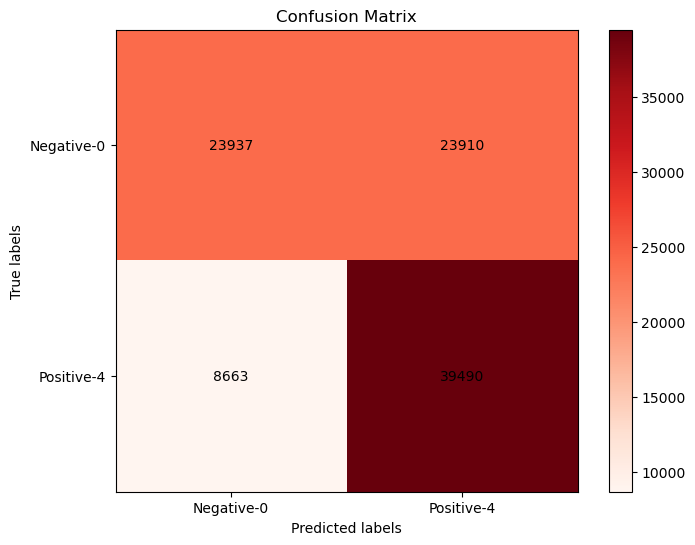

In [98]:
# Print the confusion matrix
cm = confusion_matrix(sampled_y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Convert the confusion matrix values to a numpy array
cm = np.array(cm)

# Define class names
class_names = ['Negative-0', 'Positive-4']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center', color='Black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
